### Data visualization of Imperial College's research about Covid19

In [2]:
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import missingno as msno

In [3]:
figsize = (10, 7)
matplotlib.rcParams['figure.figsize'] = figsize

In [4]:
data = pd.ExcelFile("https://pycourse.s3.amazonaws.com/ImperialCollege-COVID19-scenarios.xlsx")

In [5]:
print(f"Worksheets availables: {data.sheet_names}")

Worksheets availables: ['Countries', 'Mitigation', 'Suppression', 'Dictionary']


In [6]:
countries_df = pd.read_excel(data, data.sheet_names[0], decimal=",")

In [7]:
countries_df.head()

,"Region, subregion, country or area *",country_code,World Bank region,World Bank income grou,GDP 2018
0,Afghanistan,AFG,South Asia,Low income,1955.006208
1,Albania,ALB,Europe & Central Asia,Upper middle income,13364.155400
2,Algeria,DZA,Middle East & North Africa,Upper middle income,15481.787620
3,Angola,AGO,Sub-Saharan Africa,Lower middle income,6452.355165
4,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,26868.133520


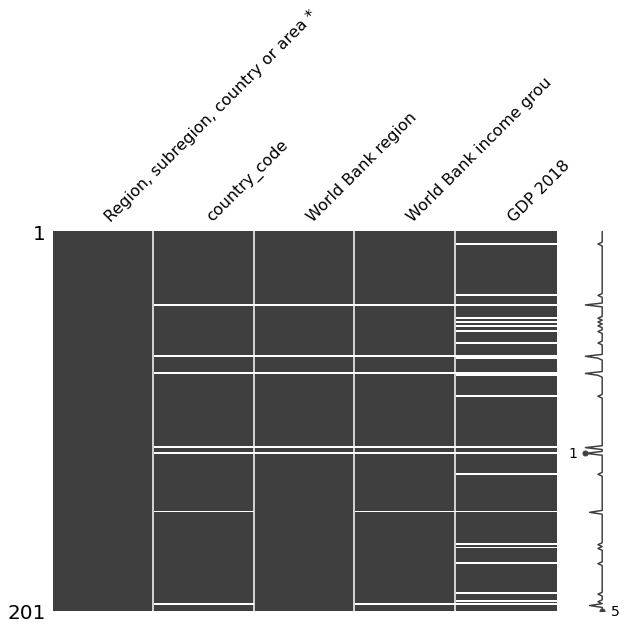

In [8]:
msno.matrix(countries_df, figsize=figsize)

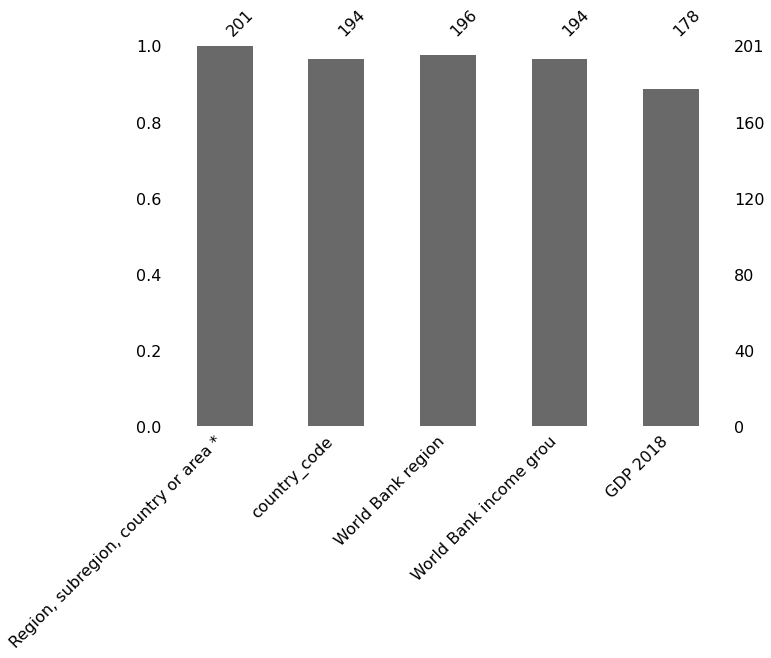

In [9]:
msno.bar(countries_df, figsize=figsize)

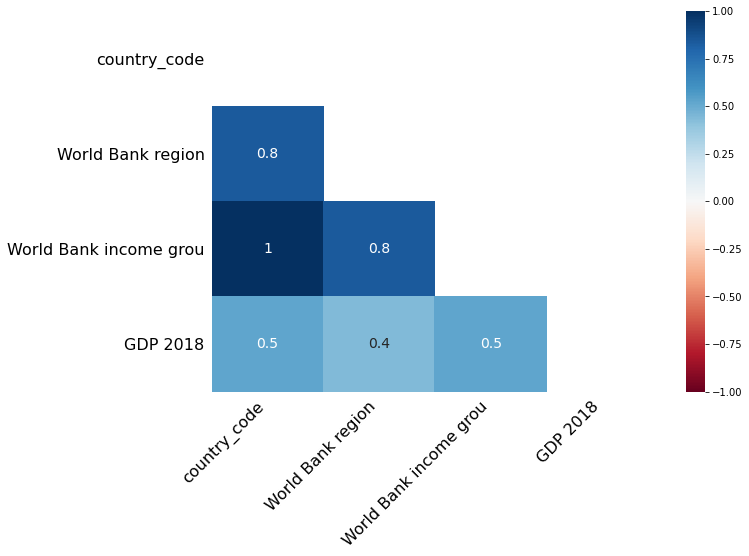

In [11]:
msno.heatmap(countries_df, figsize=figsize)

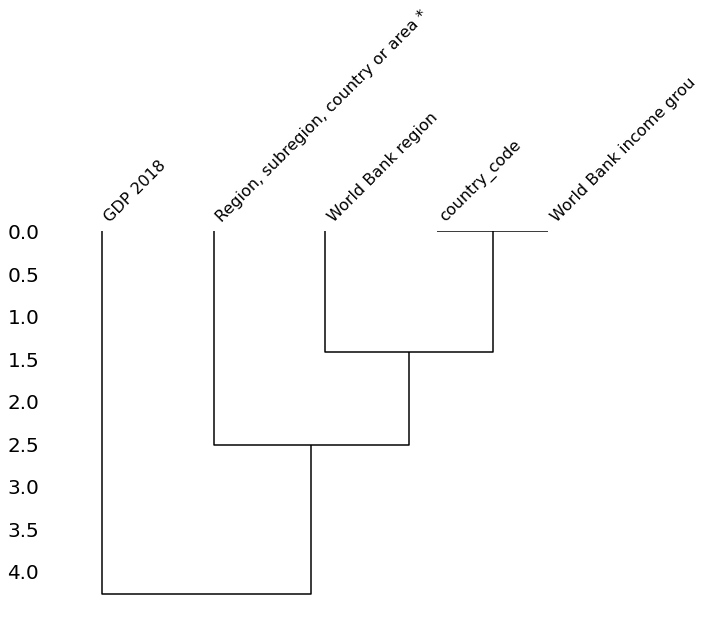

In [12]:
msno.dendrogram(countries_df, figsize=figsize)

In [14]:
countries_df.dropna(inplace=True)

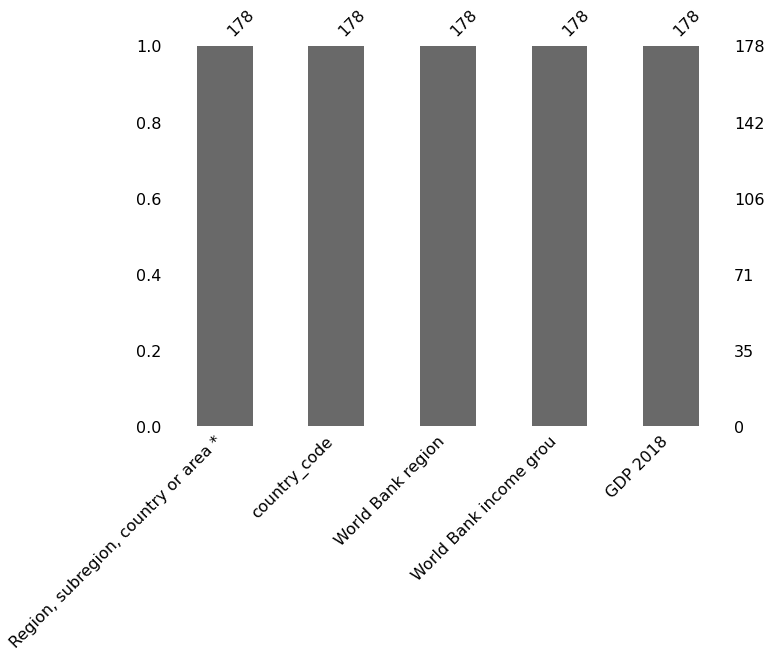

In [15]:
msno.bar(countries_df, figsize=figsize)

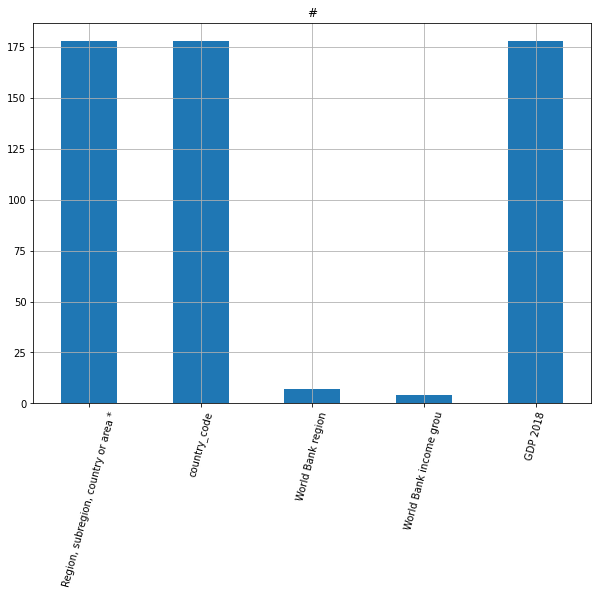

In [32]:
countries_df.nunique().plot.bar(rot=75, grid=True, title='#')

In [23]:
print(f"Unique values from column {countries_df.columns[2]}")
print(countries_df[countries_df.columns[2]].unique())

Unique values from column World Bank region
['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Latin America & Caribbean' 'East Asia & Pacific'
 'North America']


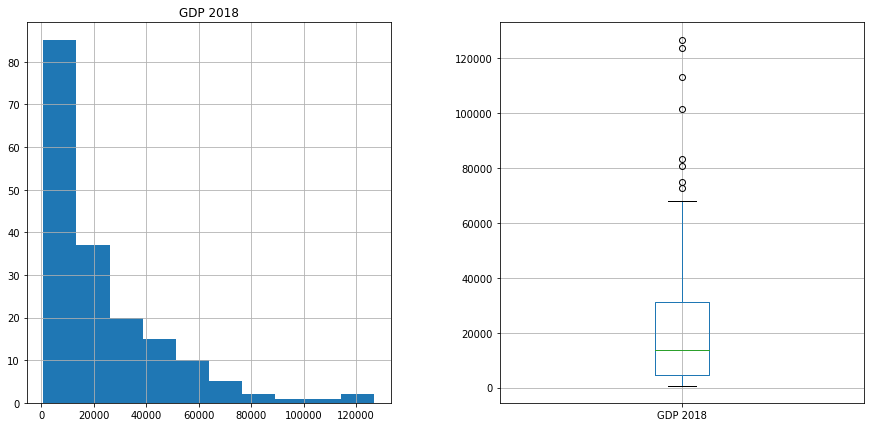

In [28]:
_, ax = plt.subplots(ncols=2, figsize=(15, 7))
countries_df.hist(column='GDP 2018', grid=True, ax=ax[0])
countries_df.boxplot(column='GDP 2018', ax=ax[1])

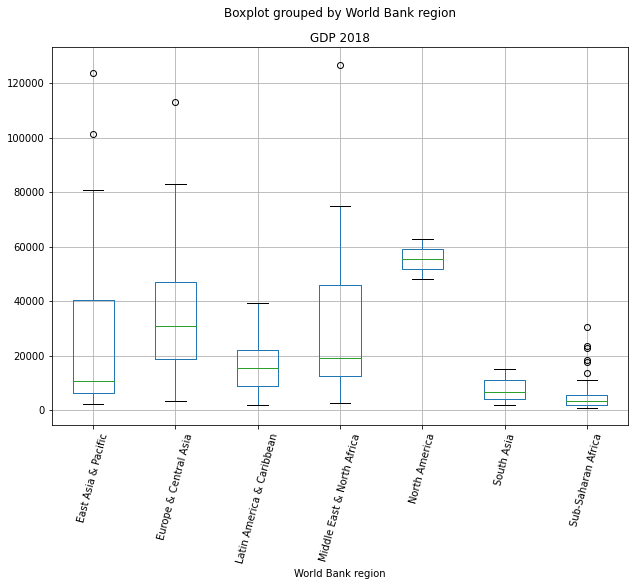

In [34]:
countries_df.boxplot(column="GDP 2018", by=countries_df.columns[2], rot=75)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

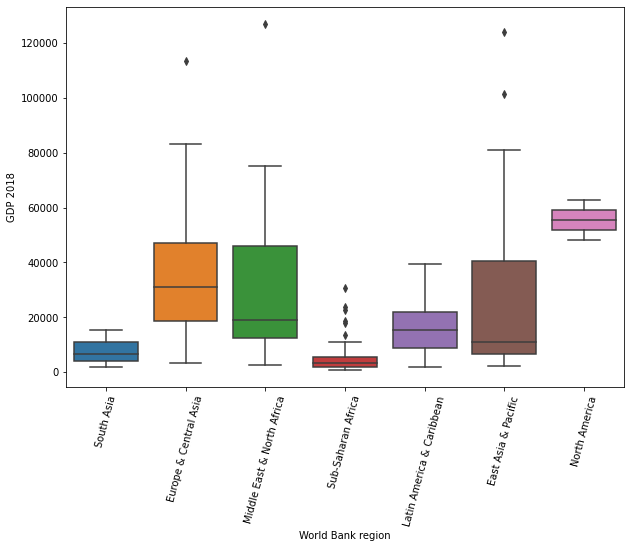

In [38]:
sns.boxplot(data=countries_df, x="World Bank region", y="GDP 2018")
plt.xticks(rotation=75)

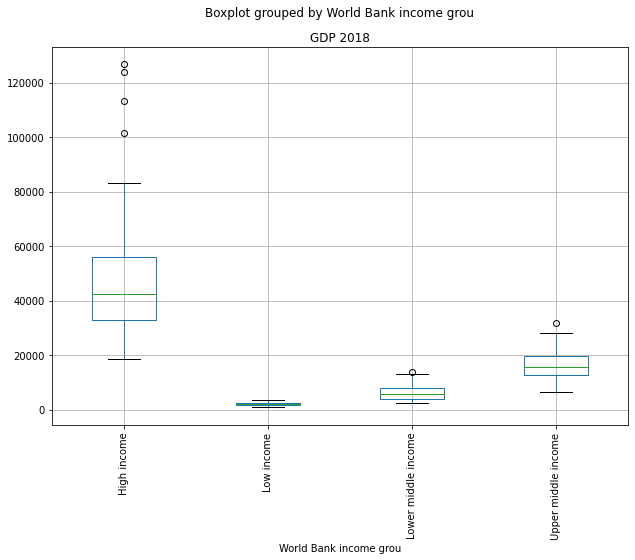

In [39]:
countries_df.boxplot(column="GDP 2018", by=countries_df.columns[3], rot=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1344bdf10>,
      dtype=object)

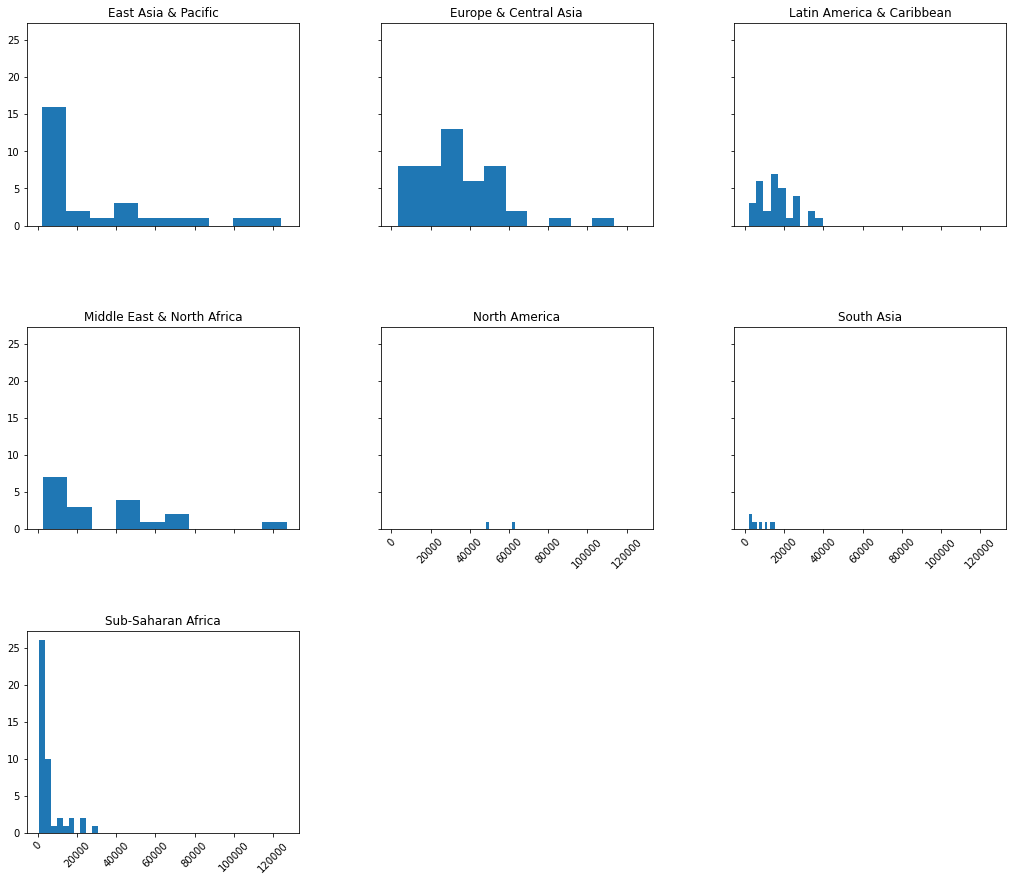

In [43]:
countries_df.hist(column="GDP 2018",
                    by=countries_df.columns[2],
                    figsize=(17, 15),
                    xrot=45,
                    sharey=True,
                    sharex=True)

## Mitigation

In [44]:
mitigation_df = pd.read_excel(data, data.sheet_names[1])

In [45]:
mitigation_df.head()

,Country,R0,Strategy,Social_distance,total_pop,total_infected,total_deaths,total_hospital,total_critical
0,Afghanistan,3.3,Unmitigated,0.0,38928341.0,36708969,77708,572873,103031
1,Albania,3.3,Unmitigated,0.0,2877800.0,2525855,20309,101349,26927
2,Algeria,3.3,Unmitigated,0.0,43851043.0,39550379,195348,1138076,258972
3,Angola,3.3,Unmitigated,0.0,32866268.0,30613383,57944,443936,76828
4,Antigua and Barbuda,3.3,Unmitigated,0.0,97928.0,85015,514,2843,681


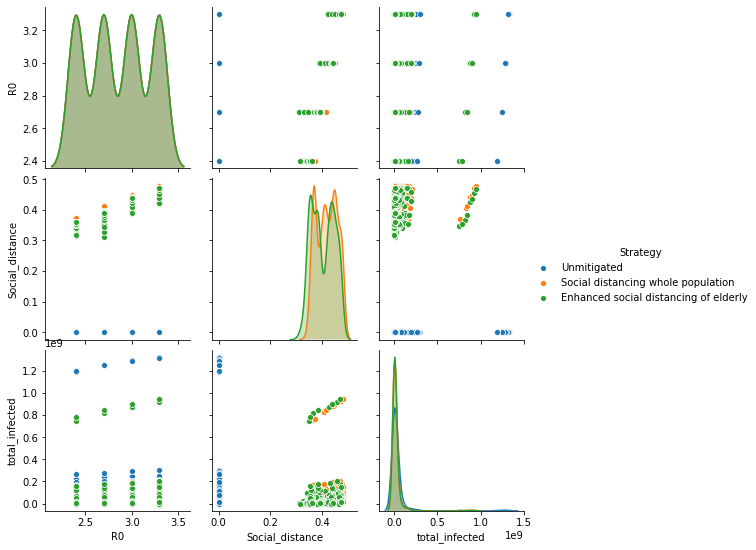

In [46]:
sns.pairplot(mitigation_df,
            vars=['R0', 'Social_distance', 'total_infected'],                         hue='Strategy')

In [47]:
br_mitigation_df = mitigation_df.loc[mitigation_df['Country']=='Brazil', :]

In [48]:
br_mitigation_df

,Country,R0,Strategy,Social_distance,total_pop,total_infected,total_deaths,total_hospital,total_critical
23,Brazil,3.3,Unmitigated,0.000000,212559409.0,187799806,1152283,6206514,1527536
224,Brazil,3.3,Social distancing whole population,0.449681,212559409.0,122025818,627047,3496359,831381
425,Brazil,3.3,Enhanced social distancing of elderly,0.440651,212559409.0,120836850,529779,3222096,702497
626,Brazil,3.0,Unmitigated,0.000000,212559409.0,181084337,1088612,5891295,1443116
827,Brazil,3.0,Social distancing whole population,0.422029,212559409.0,114348169,576128,3222624,764105
1028,Brazil,3.0,Enhanced social distancing of elderly,0.412113,212559409.0,112988886,471742,2925842,625338
1229,Brazil,2.7,Unmitigated,0.000000,212559409.0,172162607,1008804,5490012,1337612
1430,Brazil,2.7,Social distancing whole population,0.390273,212559409.0,105309523,518315,2909776,687127
1631,Brazil,2.7,Enhanced social distancing of elderly,0.370706,212559409.0,102598007,322646,2348908,427709
1832,Brazil,2.4,Unmitigated,0.000000,212559409.0,160125948,908009,4974643,1204268


In [59]:
perc_names = list(br_mitigation_df.columns.values[5:9]+'_perc')
mil_names = list(br_mitigation_df.columns.values[5:9]+'_million')

br_mitigation_df[perc_names] = br_mitigation_df.loc[:, 'total_infected':'total_critical'].div(br_mitigation_df['total_pop'], axis=0)*100

br_mitigation_df[mil_names] = br_mitigation_df.loc[:, 'total_infected':'total_critical']*1e-6

In [60]:
br_mitigation_df.head()

,Country,R0,Strategy,Social_distance,total_pop,total_infected,total_deaths,total_hospital,total_critical,total_infected_perc,total_deaths_perc,total_hospital_perc,total_critical_perc,total_infected_million,total_deaths_million,total_hospital_million,total_critical_million
23,Brazil,3.3,Unmitigated,0.000000,212559409.0,187799806,1152283,6206514,1527536,88.351679,0.542099,2.919896,0.718640,187.799806,1.152283,6.206514,1.527536
224,Brazil,3.3,Social distancing whole population,0.449681,212559409.0,122025818,627047,3496359,831381,57.407865,0.294998,1.644886,0.391129,122.025818,0.627047,3.496359,0.831381
425,Brazil,3.3,Enhanced social distancing of elderly,0.440651,212559409.0,120836850,529779,3222096,702497,56.848507,0.249238,1.515857,0.330494,120.836850,0.529779,3.222096,0.702497
626,Brazil,3.0,Unmitigated,0.000000,212559409.0,181084337,1088612,5891295,1443116,85.192341,0.512145,2.771599,0.678924,181.084337,1.088612,5.891295,1.443116
827,Brazil,3.0,Social distancing whole population,0.422029,212559409.0,114348169,576128,3222624,764105,53.795863,0.271043,1.516105,0.359478,114.348169,0.576128,3.222624,0.764105


In [61]:
no_social_distance = br_mitigation_df.loc[br_mitigation_df['Strategy'] == 'Unmitigated', :].drop(['Social_distance', 'Country'], axis=1)

In [62]:
no_social_distance

,R0,Strategy,total_pop,total_infected,total_deaths,total_hospital,total_critical,total_infected_perc,total_deaths_perc,total_hospital_perc,total_critical_perc,total_infected_million,total_deaths_million,total_hospital_million,total_critical_million
23,3.3,Unmitigated,212559409.0,187799806,1152283,6206514,1527536,88.351679,0.542099,2.919896,0.718640,187.799806,1.152283,6.206514,1.527536
626,3.0,Unmitigated,212559409.0,181084337,1088612,5891295,1443116,85.192341,0.512145,2.771599,0.678924,181.084337,1.088612,5.891295,1.443116
1229,2.7,Unmitigated,212559409.0,172162607,1008804,5490012,1337612,80.995053,0.474599,2.582813,0.629289,172.162607,1.008804,5.490012,1.337612
1832,2.4,Unmitigated,212559409.0,160125948,908009,4974643,1204268,75.332327,0.427179,2.340354,0.566556,160.125948,0.908009,4.974643,1.204268


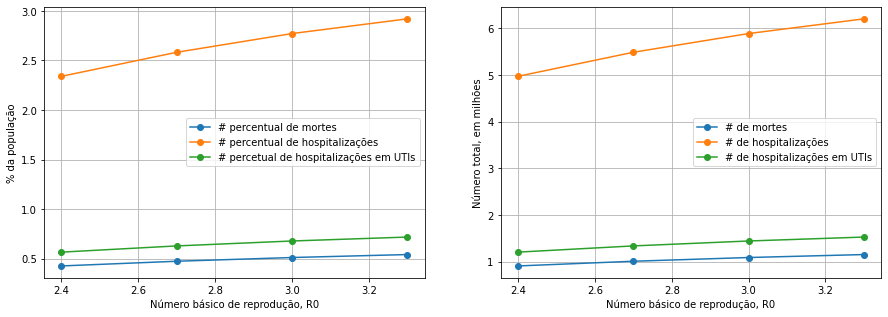

In [70]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

no_social_distance.plot(x='R0', y=['total_deaths_perc',          'total_hospital_perc', 'total_critical_perc'], style="o-", ax=ax[0], label=['# percentual de mortes', '# percentual de hospitalizações', '# percetual de hospitalizações em UTIs'])

ax[0].set_ylabel("% da população")
ax[0].set_xlabel("Número básico de reprodução, R0")
ax[0].grid()


no_social_distance.plot(x='R0', y=['total_deaths_million',          'total_hospital_million', 'total_critical_million'], style="o-", ax=ax[1], label=['# de mortes', '# de hospitalizações', '# de hospitalizações em UTIs'])

ax[1].set_ylabel("Número total, em milhões")
ax[1].set_xlabel("Número básico de reprodução, R0")
ax[1].grid()

plt.show()

Comparação entre as estratétias de mitigação

In [71]:
social_distance = br_mitigation_df.drop(['Country'], axis=1)

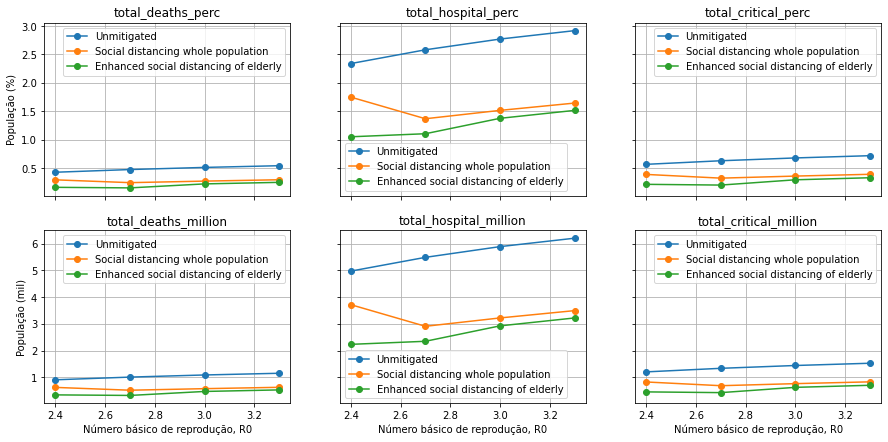

In [76]:
y = ['total_deaths', 'total_hospital', 'total_critical']
n = len(y)
fig, ax = plt.subplots(ncols=n, nrows=2, figsize=(15, 7), sharex=True, sharey='row')

for i in range(n):
    column = [y[i]+'_perc', y[i]+'_million']
    df = social_distance.loc[:, column+['R0', 'Strategy']]
    for s in df['Strategy'].unique():
        df.loc[df['Strategy']==s, :].plot(x='R0', y=[column[0]], style="o-", ax=ax[0][i], label=[s])

        ax[0][i].grid()
        ax[0][i].set_title(column[0])
        ax[0][i].set_ylabel("População (%)")
        ax[0][i].set_xlabel("Número básico de reprodução, R0")



        column = [y[i]+'_perc', y[i]+'_million']
    df = social_distance.loc[:, column+['R0', 'Strategy']]
    for s in df['Strategy'].unique():
        df.loc[df['Strategy']==s, :].plot(x='R0', y=[column[1]], style="o-", ax=ax[1][i], label=[s])

        ax[1][i].grid()
        ax[1][i].set_title(column[1])
        ax[1][i].set_ylabel("População (mil)")
        ax[1][i].set_xlabel("Número básico de reprodução, R0")